In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pathlib
from pathlib import Path

import matplotlib.pyplot as plt
import mplhep
import numpy as np
import pandas as pd
import uproot

import plotly.express as px
import plotly.graph_objects as go

In [3]:
datafile = Path("~/Projects/data/sources/2022-06-30_crt_sample/hist_data_dl4_fstrmNUMI_run8459_1_20220607T163650_20220614T174713_pot_20220614T195039_stage0_20220616T221114_stage1.root").expanduser()

if not datafile.exists():
    print("file does not exist")

In [15]:
with uproot.open(datafile) as f:
    crtdf = f["CRTDataAnalysis/HitTree"].arrays(library="pd")
    dfE = f["caloskimE/TrackCaloSkim"].arrays(library="pd")    
    dfW = f["caloskimW/TrackCaloSkim"].arrays(library="pd")

In [32]:
def make_df(dfs):
    if not isinstance(dfs, tuple):
        assert(isinstance(dfs, pd.DataFrame))
        dfs = [dfs]
    else:
        dfs = list(dfs)
        
    npad = [max([len(b.split(".")) for b in df.columns]) for df in dfs]
    def pad(b, i):
        while len(b) < npad[i]:
            b.append("")
        return tuple(b)

    for i in range(len(dfs)):
        dfs[i].columns = pd.MultiIndex.from_tuples([pad(b.split("."), i) for b in dfs[i].columns])

    # set the index name if not present
    for i in range(len(dfs)):
        if len(dfs[i].index.names) == 1 and dfs[i].index.names[0] is None:
            dfs[i].index = dfs[i].index.set_names(["entry"])

    return dfs

In [72]:
# make_df([dfE[0], dfW[0]])
dfs = pd.concat([dfE[0], dfW[0]])
dfs.sort_index(axis=1, inplace=True)
evt = dfs[dfs[("meta", "evt")] == 987][("hits0", "h", "sp")]# for idx in dfs[dfs[("meta", "evt")] == 987].index: print(idx[0])#.loc[: ,[("meta", "event"), ("hits0", "h", "sp")]]
evt = evt.dropna()

In [5]:
# selE = tracksE[0][tracksE[0]["selected"] == True]
# selW = tracksW[0][tracksW[0]["selected"] == True]

In [73]:
evt

x           y           z
entry subentry                                    
15    89       -235.682388 -177.231430  743.549011
      90       -235.584976 -176.895309  743.616516
      91       -235.870819 -176.667511  743.663635
      92       -236.054337 -176.410919  743.717102
      93       -235.755585 -176.015121  743.800537
...                    ...         ...         ...
23    769       223.485229  132.190247  -82.095894
      770       223.775070  132.540985  -82.163422
      771       223.784973  132.807114  -82.213013
      772       223.931854  132.752136  -82.201431
      773       223.934311  133.184296  -82.300797

[3503 rows x 3 columns]

In [81]:
crthits = crtdf[crtdf["event"] == 987][["x", "y", "z"]]

In [7]:
# concatted["event"].unique()

array([  39,  399,  987, 1071, 1119, 1179, 1263, 1431, 1443, 1803, 1851,
       1959, 1971, 2403, 2775, 2907, 3291, 3567, 3603,   51,  303,  663,
        687,  759,  795,  819,  963, 1227, 1455, 2343, 2391, 2607, 2727,
       3447, 3507, 3531], dtype=int32)

In [8]:
# sel = sel[sel["meta.evt"] == 39]

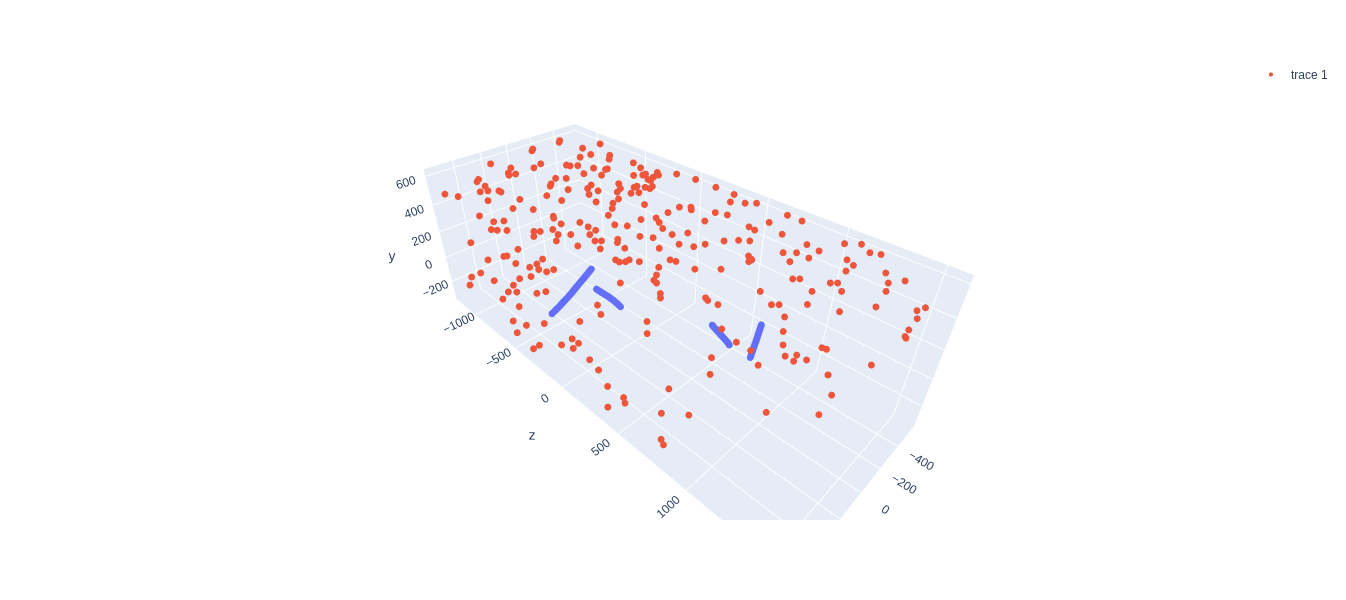

In [102]:
fig = px.scatter_3d(data_frame=evt, x="x", y="z", z="y", width=900, height=600)
fig.add_scatter3d(mode="markers", x=crthits.x, y=crthits.z, z=crthits.y)
# fig2 = px.scatter_3d(sel, x=sel["hits0.tp.z"], y=sel["hits0.tp.x"], z=sel["hits0.tp.y"], color=sel["hits0.dqdx"])
# range_x=[-358.49, 358.49], range_y=[-894.95, 894.95], range_z=[-181.86, 134.96]

fig.update_traces(marker={'size': 4})

fig.show()